## EDA Toolkit Demo

This notebook provides a walkthrough of key functionalities from the EDA Toolkit, a lightweight Python library designed to streamline exploratory data analysis. Whether you're working in Jupyter, building reports for stakeholders, or preparing datasets for modeling, the toolkit helps automate the process of generating summary statistics, visualizations, and Markdown exports.

In this demo, we'll walk through:

- Importing and reading data
- Creating summary tables (Table 1 style)
- Exporting clean, readable output for use in documentation or publication

In [1]:
import pandas as pd

### Read-in The Data

In [2]:
df = pd.read_parquet("../data/raw/df.parquet")

### Table 1

#### Example 1: Mixed Summary Table

In the example below, we generate a summary table from a dataset containing both 
categorical and continuous variables. We explicitly define which columns fall into 
each category, although the ``generate_table1`` function also supports automatic 
detection of variable types if desired.

The summary output is automatically pretty-printed in the console using the 
``table1_to_str`` utility. This formatting is applied behind the scenes whenever 
a summary table is printed, making it especially helpful for reading outputs 
within notebooks or logging environments.

In this case, we specify ``export_markdown=True`` and provide a filename via
``markdown_path``. This allows the summary to be exported in Markdown format
for use in reports, documentation, or publishing platforms like Jupyter Book or Quarto.
When ``include_types="both"`` and ``combine=True`` (the default), both continuous and 
categorical summaries are merged into a single DataFrame and written to two separate 
Markdown files with ``_continuous.md`` and ``_categorical.md`` suffixes.

We also set ``value_counts=False`` to limit each categorical variable to a single 
summary row, rather than expanding into one row per category-level value.

In [3]:
from eda_toolkit import generate_table1

table1 = generate_table1(
    df=df,
    categorical_cols=["sex", "race", "workclass"],
    continuous_cols=["hours-per-week", "age", "education-num"],
    value_counts=False,
    max_categories=3,
    export_markdown=True,
    decimal_places=0,
    markdown_path="table1_summary.md",
)

print(table1)

 Variable       | Type        | Mean | SD | Median | Min | Max | Mode    | Missing (n) | Missing (%) | Count  | Proportion (%) 
----------------|-------------|------|----|--------|-----|-----|---------|-------------|-------------|--------|----------------
 hours-per-week | Continuous  | 40   | 12 | 40     | 1   | 99  | 40      | 0           | 0           | 48,842 | 100            
 age            | Continuous  | 39   | 14 | 37     | 17  | 90  | 36      | 0           | 0           | 48,842 | 100            
 education-num  | Continuous  | 10   | 3  | 10     | 1   | 16  | 9       | 0           | 0           | 48,842 | 100            
 sex            | Categorical |      |    |        |     |     | Male    | 0           | 0           | 48,842 | 100            
 race           | Categorical |      |    |        |     |     | White   | 0           | 0           | 48,842 | 100            
 workclass      | Categorical |      |    |        |     |     | Private | 963         | 2           | 4

### Example 2: Mixed Summary Table ``(value_counts=True)``

In this example, we call ``generate_table1`` without manually specifying which 
columns are categorical or continuous. Instead, the function automatically detects 
variable types based on data types. Numeric columns with two or fewer unique values 
are also reclassified as categorical by default 
(controlled via ``detect_binary_numeric=True``).

We set ``value_counts=True`` to generate a separate summary row for each unique value 
within a categorical variable, rather than a single row per variable. To keep 
the output concise, we limit each breakdown to the top 3 most frequent values 
using ``max_categories=3``.

We also enable ``export_markdown=True`` to export the summaries in Markdown format. 
While you can specify a custom markdown_path, if none is provided, the output files 
are saved to the current working directory.

Since ``include_types="both"`` is the default and ``combine=True`` by default as well, 
the underlying summaries are merged into a single DataFrame for display—but two 
separate Markdown files are still generated with suffixes that reflect the type of 
summary:

- ``table1_summary_continuous.md``
- ``table1_summary_categorical.md``

This setup is ideal for detailed reporting, especially when working with 
downstream tools like Jupyter Book, Quarto, or static site generators.

In [4]:
from eda_toolkit import generate_table1

table1_cont, table1_cat = generate_table1(
    df=df,
    value_counts=True,
    max_categories=3,
    combine=False,
    export_markdown=True,
    markdown_path="table1_summary.md",
)

table1_cont = table1_cont.drop(columns=["Type", "Mode"])

 Variable       | Type       | Mean       | SD         | Median     | Min       | Max          | Mode       | Missing (n) | Missing (%) | Count  | Proportion (%) 
----------------|------------|------------|------------|------------|-----------|--------------|------------|-------------|-------------|--------|----------------
 age            | Continuous | 38.64      | 13.71      | 37.00      | 17.00     | 90.00        | 36.00      | 0           | 0.00        | 48,842 | 100.00         
 capital-gain   | Continuous | 1,079.07   | 7,452.02   | 0.00       | 0.00      | 99,999.00    | 0.00       | 0           | 0.00        | 48,842 | 100.00         
 capital-loss   | Continuous | 87.50      | 403.00     | 0.00       | 0.00      | 4,356.00     | 0.00       | 0           | 0.00        | 48,842 | 100.00         
 education-num  | Continuous | 10.08      | 2.57       | 10.00      | 1.00      | 16.00        | 9.00       | 0           | 0.00        | 48,842 | 100.00         
 fnlwgt         | Cont

In [5]:
table1_cont

,Variable,Mean,SD,Median,Min,Max,Missing (n),Missing (%),Count,Proportion (%)
0,age,38.64,13.71,37.00,17.00,90.00,0,0.00,"48,842",100.00
1,capital-gain,"1,079.07","7,452.02",0.00,0.00,"99,999.00",0,0.00,"48,842",100.00
2,capital-loss,87.50,403.00,0.00,0.00,"4,356.00",0,0.00,"48,842",100.00
3,education-num,10.08,2.57,10.00,1.00,16.00,0,0.00,"48,842",100.00
4,fnlwgt,"189,664.13","105,604.03","178,144.50","12,285.00","1,490,400.00",0,0.00,"48,842",100.00
5,hours-per-week,40.42,12.39,40.00,1.00,99.00,0,0.00,"48,842",100.00


In [6]:
table1_cat

,Variable,Type,Mode,Missing (n),Missing (%),Count,Proportion (%)
0,workclass = Private,Categorical,Private,963,1.97,"33,906",69.42
1,workclass = Self-emp-not-inc,Categorical,Private,963,1.97,"3,862",7.91
2,workclass = Local-gov,Categorical,Private,963,1.97,"3,136",6.42
3,education = HS-grad,Categorical,HS-grad,0,0.00,"15,784",32.32
4,education = Some-college,Categorical,HS-grad,0,0.00,"10,878",22.27
5,education = Bachelors,Categorical,HS-grad,0,0.00,"8,025",16.43
6,marital-status = Married-civ-spouse,Categorical,Married-civ-spouse,0,0.00,"22,379",45.82
7,marital-status = Never-married,Categorical,Married-civ-spouse,0,0.00,"16,117",33.00
8,marital-status = Divorced,Categorical,Married-civ-spouse,0,0.00,"6,633",13.58
9,occupation = Prof-specialty,Categorical,Prof-specialty,966,1.98,"6,172",12.64


### Histogram Example - (Mean, Median, and Std. Deviation)

In this example, the ``kde_distributions()`` function is customized to generate 
a histogram that include mean, median, and 3 standard deviation lines. The 
``mean_color`` is set to ``"blue"`` and the median_color is set to ``"black"``, 
allowing for a clear distinction between these two central tendency measures. 
The function parameters are adjusted to ensure that both the mean and median lines 
are plotted ``(plot_mean=True, plot_median=True)``. The ``y_axis_label`` remains
``"Density"``, indicating that the histograms represent the density of observations 
within each bin. The histogram bars are colored using ``hist_color="brown"``, 
with a ``fill_alpha=0.40``, which adjusts the transparency of the fill color. 
Additionally, standard deviation bands are plotted using colors ``"purple"``, 
``"green"``, and ``"silver"`` for one, two, and three standard deviations, respectively.

The layout is configured with a single row and multiple columns ``(n_rows=1, n_cols=3)``, 
and the grid size is set to `15x5 inches`. This setup is particularly useful for 
visualizing the central tendencies within the data while also providing a clear 
view of the distribution and spread through the standard deviation bands. The 
configuration used in this example showcases how histograms can be enhanced with 
statistical overlays to provide deeper insights into the data.

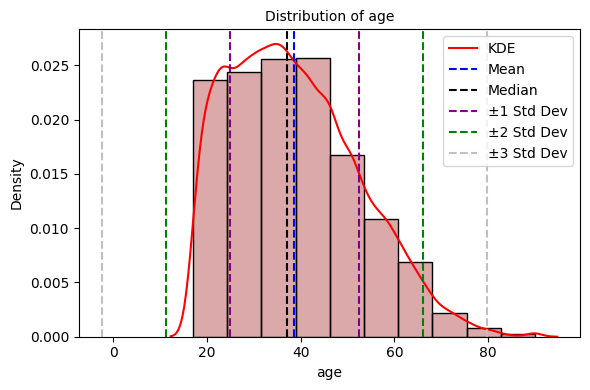

In [7]:
from eda_toolkit import kde_distributions

vars_of_interest = [
    "age",
]

kde_distributions(
    df=df,
    figsize=(6, 4),
    text_wrap=50,
    hist_color="brown",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,
    y_axis_label="Density",
    bins=10,
    fill_alpha=0.40,
    plot_type="both",
    stat="Density",
    # label_fontsize=16,  # Font size for axis labels
    # tick_fontsize=14,  # Font size for tick labels
    plot_mean=True,
    plot_median=True,
    mean_color="blue",
    std_dev_levels=[
        1,
        2,
        3,
    ],
    std_color=[
        "purple",
        "green",
        "silver",
    ],
    image_filename="age_distribution_mean_median_std",
)